In [1]:
import os 
from pathlib import Path
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
from shutil import copyfile
from qgis.core import QgsVectorLayer, QgsRasterLayer
from qgis.analysis import QgsZonalStatistics
from utils.read_files import read_from_control, make_default_path

In [2]:
# Store the name of the 'active' file in a variable
basin = "EastRiver"
controlFile = f'control_{basin}.txt'
# basin name and outlet gauge id
root_path = Path(read_from_control(controlFile, "root_path"))
name = read_from_control(controlFile, "domain_name")

In [3]:
catchment_path = root_path / f"domain_{name}" / "shapefiles" / "catchment" 
catchment_name = f"{name}_distributed_elevation_zone.shp"

dem_path = root_path / f"domain_{name}" / "parameters" / "dem" 
dem_name = "dem.tif"

In [4]:
intersect_path = root_path / f"domain_{name}" / 'shapefiles/catchment_intersection/with_dem'
intersect_name = f"{name}_catchment_intersection.shp"

In [5]:
# Find the name without extension
catchment_base = catchment_name.replace('.shp','')

In [6]:
# Loop over directory contents and copy files that match the filename of the shape
for file in os.listdir(catchment_path):
    if catchment_base in file: # copy only the relevant files in case there are more than 1 .shp files
        
        # make the output file name
        _,ext = os.path.splitext(file)                    # extension of current file
        basefile,_ = os.path.splitext(intersect_name)     # name of the intersection file w/o extension
        newfile = basefile + ext                          # new name + old extension
        
        # copy
        copyfile(catchment_path/file, intersect_path/newfile);

In [ ]:
# Convert Path() to string for QGIS
catchment_file = str(intersect_path/intersect_name) # needs to be the copied file because output is automatically added to this
dem_file = str(dem_path/dem_name)

In [8]:
# Load the shape and raster
layer_polygon = QgsVectorLayer(catchment_file,'merit_hydro_basin','ogr') # this works
layer_raster  = QgsRasterLayer(dem_file,'merit_hydro_dem') # this works

Application path not initialized
Application path not initialized
Application path not initialized
Application path not initialized
Application path not initialized
Application path not initialized
Application path not initialized
Application path not initialized


In [9]:
# Check we loaded the layers correctly
if not layer_raster.isValid():
    print('Raster layer failed to load')
    
if not layer_polygon.isValid():
    print('Polygon layer failed to load')

In [10]:
# Create a zonal statistics object, automatically saved to file
band = 1 # raster band with the data we are after
zonalstats = QgsZonalStatistics(layer_polygon,                 # shapefile
                                layer_raster,                  # .tif
                                'elev_',                       # prefix for the new column added to the shapefile  
                                band,                          # raster band we're interested in
                                stats=QgsZonalStatistics.Mean).calculateStatistics(None)

QObject::startTimer: Timers can only be used with threads started with QThread
Warning 1: Value 206830746.98144582 of field HRU_area of feature 0 not successfully written. Possibly due to too larger number with respect to field width
Warning 1: Value 372989589.04101098 of field HRU_area of feature 1 not successfully written. Possibly due to too larger number with respect to field width
Warning 1: Value 163108286.0009017 of field HRU_area of feature 2 not successfully written. Possibly due to too larger number with respect to field width


# Example demonstrating the output

<Axes: >

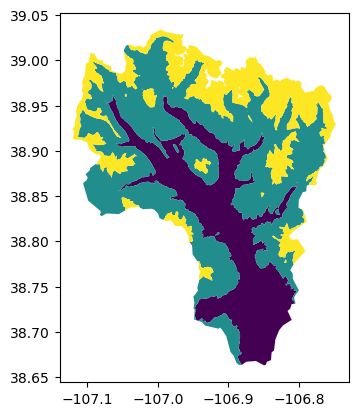

In [11]:
df = gpd.read_file(intersect_path/intersect_name)
df.plot(column='elev_mean')

In [15]:
df

,GRU_ID,HRU_ID,HRU_area,center_lat,center_lon,elev_mean,geometry
0,09112500,0,2.068307e+08,38.808385,-106.906338,2729.713377,"MULTIPOLYGON (((-107.06403 38.96235, -107.0637..."
1,09112500,1,3.729896e+08,38.884341,-106.938194,3142.855569,"MULTIPOLYGON (((-106.85795 38.98164, -106.8576..."
2,09112500,2,1.631083e+08,38.940954,-106.916908,3576.049575,"MULTIPOLYGON (((-107.02688 38.98330, -107.0259..."


In [17]:
gpd.read_file("/storage/dlhogan/summa_modeling_data/domain_EastRiver/shapefiles/catchment_intersection/with_veg/catchment_with_nlcd.shp")

,GRU_ID,HRU_ID,HRU_area,center_lat,center_lon,soilClass_,landcover_,geometry
0,09112500,0,2.068307e+08,38.808385,-106.906338,3.0,6.0,"MULTIPOLYGON (((-107.06403 38.96235, -107.0637..."
1,09112500,1,3.729896e+08,38.884341,-106.938194,3.0,1.0,"MULTIPOLYGON (((-106.85795 38.98164, -106.8576..."
2,09112500,2,1.631083e+08,38.940954,-106.916908,8.0,6.0,"MULTIPOLYGON (((-107.02688 38.98330, -107.0259..."


In [16]:
intersect_path

PosixPath('/storage/dlhogan/summa_modeling_data/domain_EastRiver/shapefiles/catchment_intersection/with_dem')